# Supervised Learning Capstone Project - Tree Methods Focus 

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----

## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fellmir/pyMachineLearningMasterclass/main/input_data/Telco-Customer-Churn.csv')

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [5]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [6]:
# CODE HERE
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [8]:
# CODE HERE
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.shape

(7032, 21)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [21]:
def count_all_unique_values(df):
    value_counts_dict = {}
    for col in df.columns:
        if df[col].nunique() <= 10:
            value_counts_dict[col] = df[col].value_counts()
    # Transpose the DataFrame, fill NaN values with 0, and convert counts to integers
    return pd.DataFrame.from_dict(value_counts_dict, orient='index').T.fillna(0).astype(int)

In [22]:
value_counts_df = count_all_unique_values(df)

In [23]:
value_counts_df.transpose()

,Male,Female,0,1,No,Yes,No phone service,Fiber optic,DSL,No internet service,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
gender,3549,3483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SeniorCitizen,0,0,5890,1142,0,0,0,0,0,0,0,0,0,0,0,0,0
Partner,0,0,0,0,3639,3393,0,0,0,0,0,0,0,0,0,0,0
Dependents,0,0,0,0,4933,2099,0,0,0,0,0,0,0,0,0,0,0
PhoneService,0,0,0,0,680,6352,0,0,0,0,0,0,0,0,0,0,0
MultipleLines,0,0,0,0,3385,2967,680,0,0,0,0,0,0,0,0,0,0
InternetService,0,0,0,0,1520,0,0,3096,2416,0,0,0,0,0,0,0,0
OnlineSecurity,0,0,0,0,3497,2015,0,0,0,1520,0,0,0,0,0,0,0
OnlineBackup,0,0,0,0,3087,2425,0,0,0,1520,0,0,0,0,0,0,0
DeviceProtection,0,0,0,0,3094,2418,0,0,0,1520,0,0,0,0,0,0,0


**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

Text(0, 0.5, 'Count')

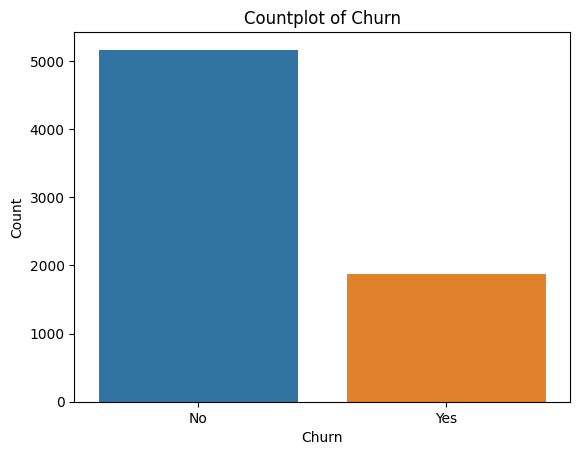

In [30]:
# CODE HERE
sns.countplot(x='Churn', data=df)

plt.title('Countplot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

Text(0, 0.5, 'Total Charges')

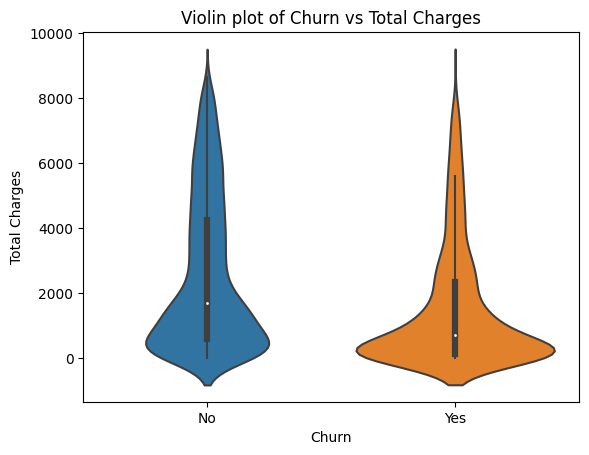

In [32]:
# CODE HERE
sns.violinplot(data=df, x='Churn', y='TotalCharges')

plt.title('Violin plot of Churn vs Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

Text(0, 0.5, 'Total Charges')

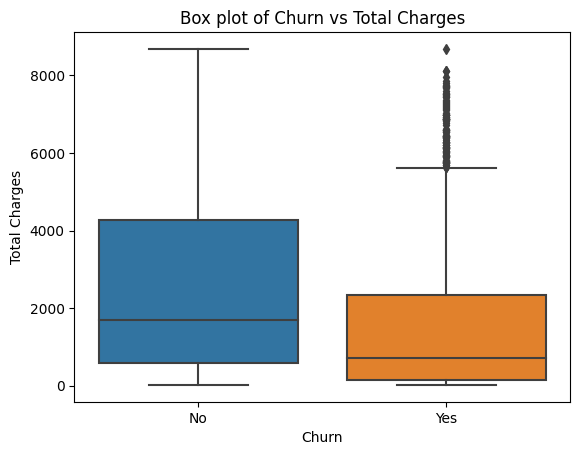

In [33]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

plt.title('Box plot of Churn vs Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

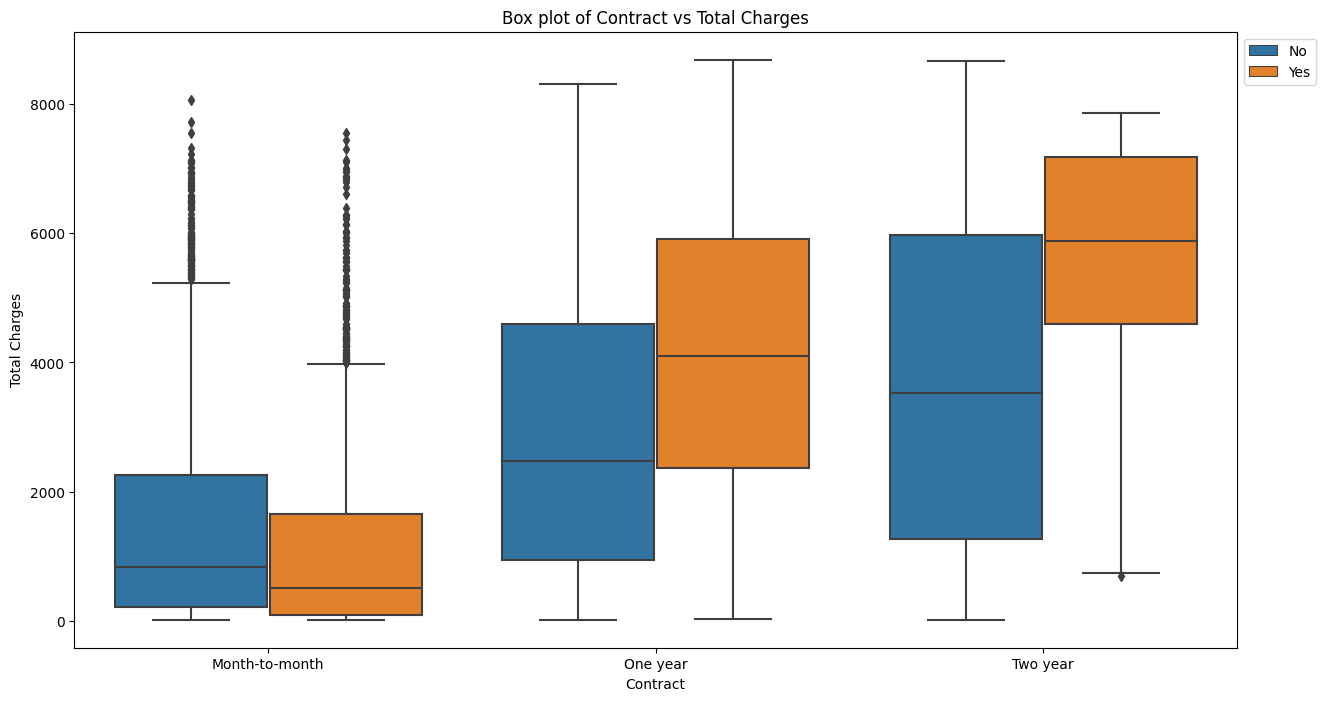

In [39]:
# CODE HERE
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

plt.title('Box plot of Contract vs Total Charges')
plt.xlabel('Contract')
plt.ylabel('Total Charges')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [40]:
# CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
columns_to_convert = ['gender', 'Partner', 'Dependents','PhoneService', 
                      'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'InternetService', 'StreamingTV', 'StreamingMovies', 
                      'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [45]:
df_dummies = pd.get_dummies(df, columns=columns_to_convert, drop_first=True)

In [46]:
df_dummies.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [47]:
df_corr = df_dummies.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1).corr()

In [48]:
df_corr

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,-0.182519,-0.038576,-0.182519,...,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
gender_Male,-0.001819,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,0.004745,-0.016328,0.004745,...,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,-0.000286,0.143346,-0.000286,...,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,0.138383,0.080786,0.138383,...,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.171817,-0.091676,0.171817,...,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.171817,0.091676,-0.171817,...,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,-0.210794,0.098592,-0.210794,...,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033
OnlineSecurity_No internet service,-0.182519,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,1.000000,-0.332799,1.000000,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
OnlineSecurity_Yes,-0.038576,-0.016328,0.143346,0.080786,-0.091676,0.091676,0.098592,-0.332799,1.000000,-0.332799,...,0.175514,-0.332799,0.187426,0.100658,0.191698,-0.004051,0.115473,-0.112295,-0.079918,-0.171270
OnlineBackup_No internet service,-0.182519,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,1.000000,-0.332799,1.000000,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578


In [50]:
df_corr['Churn_Yes'].sort_values()

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

Text(0, 0.5, 'Features')

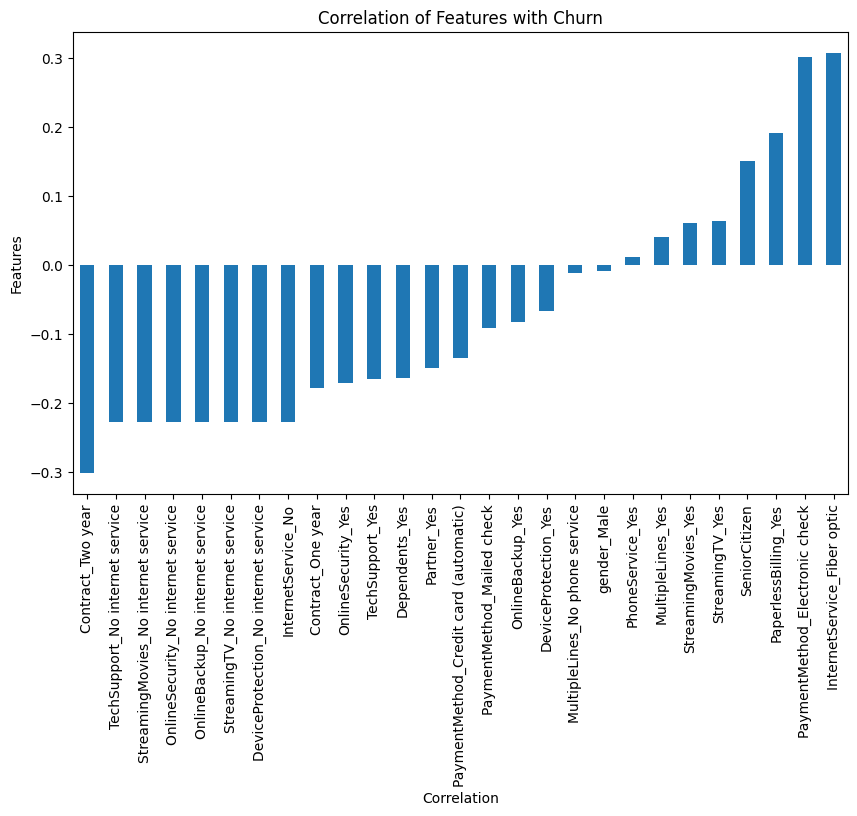

In [51]:
churn_corr = df_corr['Churn_Yes']

churn_corr = churn_corr.drop('Churn_Yes')

# sorted_corr = fraud_corr.reindex(fraud_corr.abs().sort_values(ascending=True).index)

sorted_corr = churn_corr.reindex(churn_corr.sort_values(ascending=True).index)

plt.figure(figsize=(10,6))
sorted_corr.plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation')
plt.ylabel('Features')

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [52]:
# CODE HERE
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

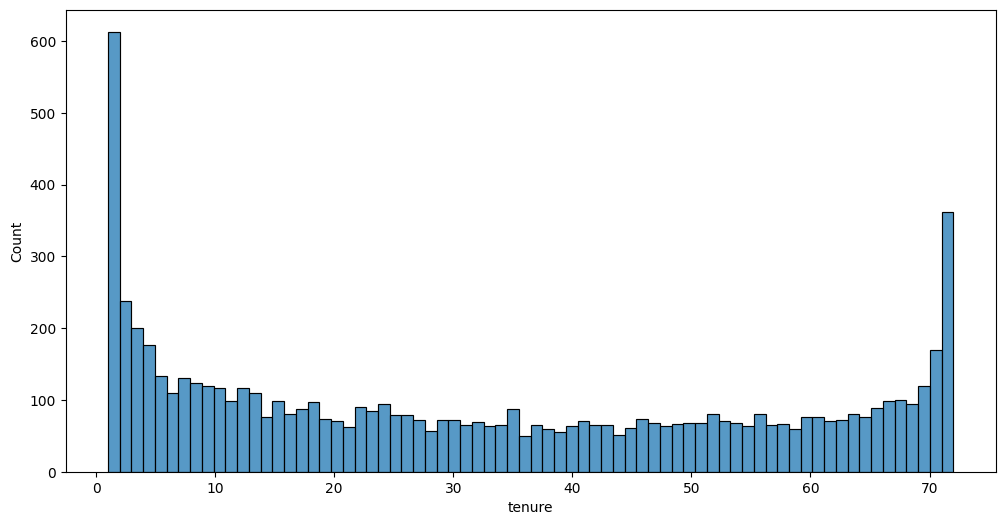

In [58]:
# CODE HERE
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='tenure',bins=72)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

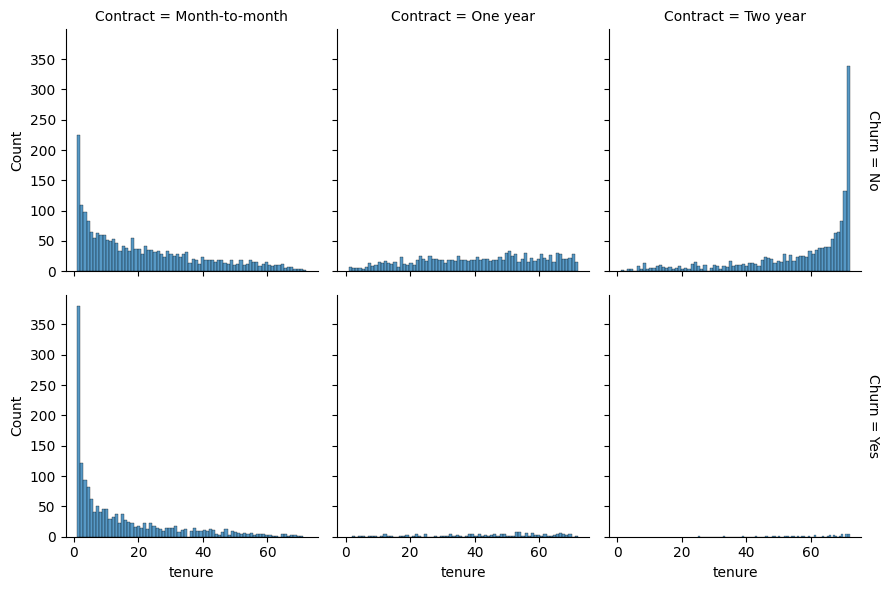

In [59]:
# CODE HERE
g = sns.FacetGrid(df, col="Contract", row="Churn", margin_titles=True)
g.map(sns.histplot, 'tenure', bins=72)

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [60]:
# CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

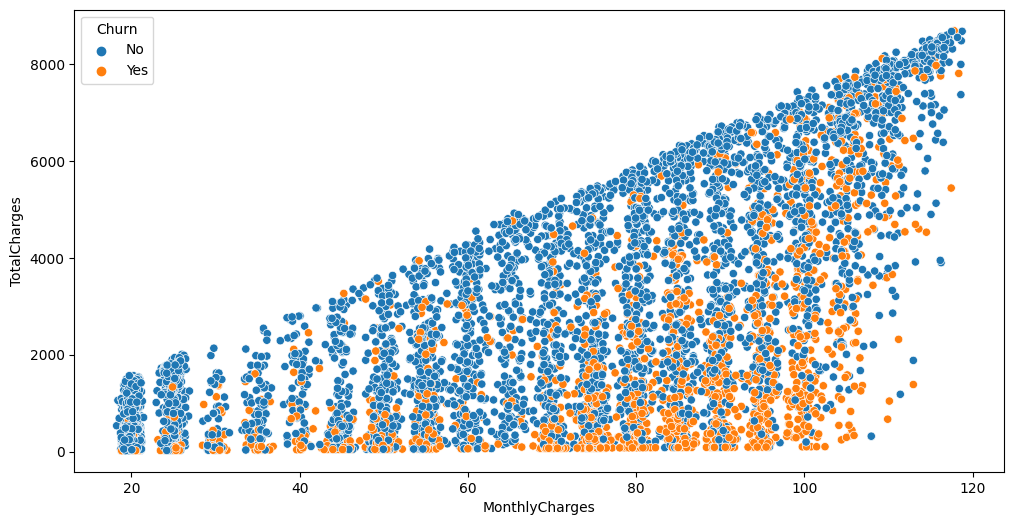

In [62]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [63]:
# CODE HERE
def calculate_churn_rate(x):
    return sum(x == 'Yes') / len(x) * 100

In [64]:
churn_rate_per_cohort = df.groupby('tenure')['Churn'].apply(calculate_churn_rate)

In [65]:
print(churn_rate_per_cohort)

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64


tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [66]:
churn_rate_per_cohort.head()

tenure
1    61.990212
2    51.680672
3    47.000000
4    47.159091
5    48.120301
Name: Churn, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

Text(0.5, 1.0, 'Churn Rate by Tenure')

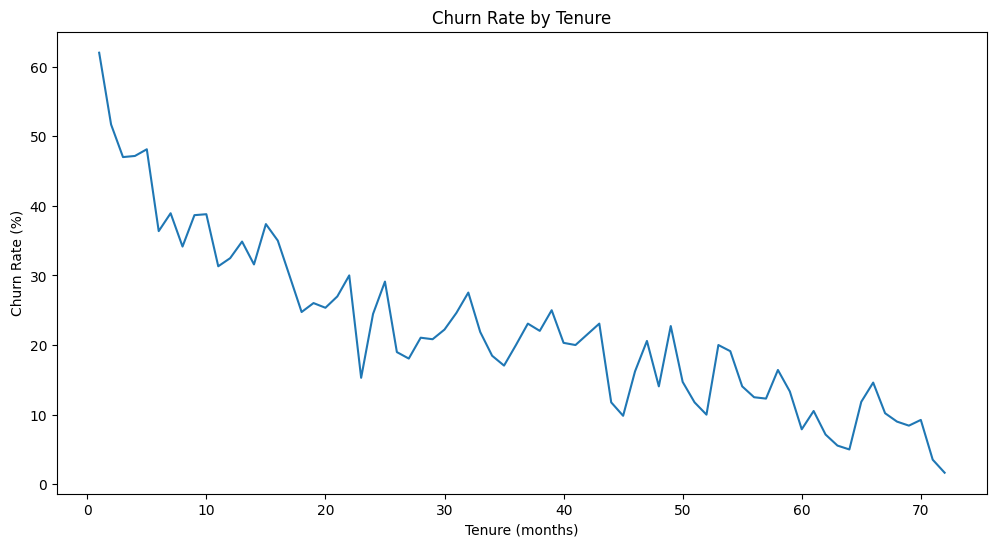

In [69]:
# CODE HERE
plt.figure(figsize=(12,6))
plt.plot(churn_rate_per_cohort.index, churn_rate_per_cohort.values)
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [3]:
# CODE HERE
bins = [0, 12, 24, 48, df['tenure'].max()]

labels = ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']

df['Tenure Cohort'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

In [76]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

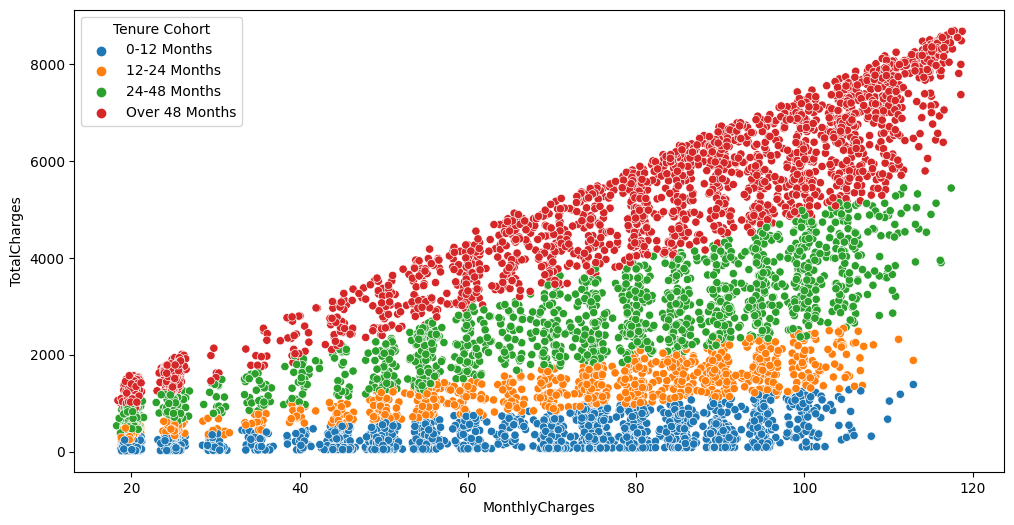

In [78]:
# CODE HERE
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

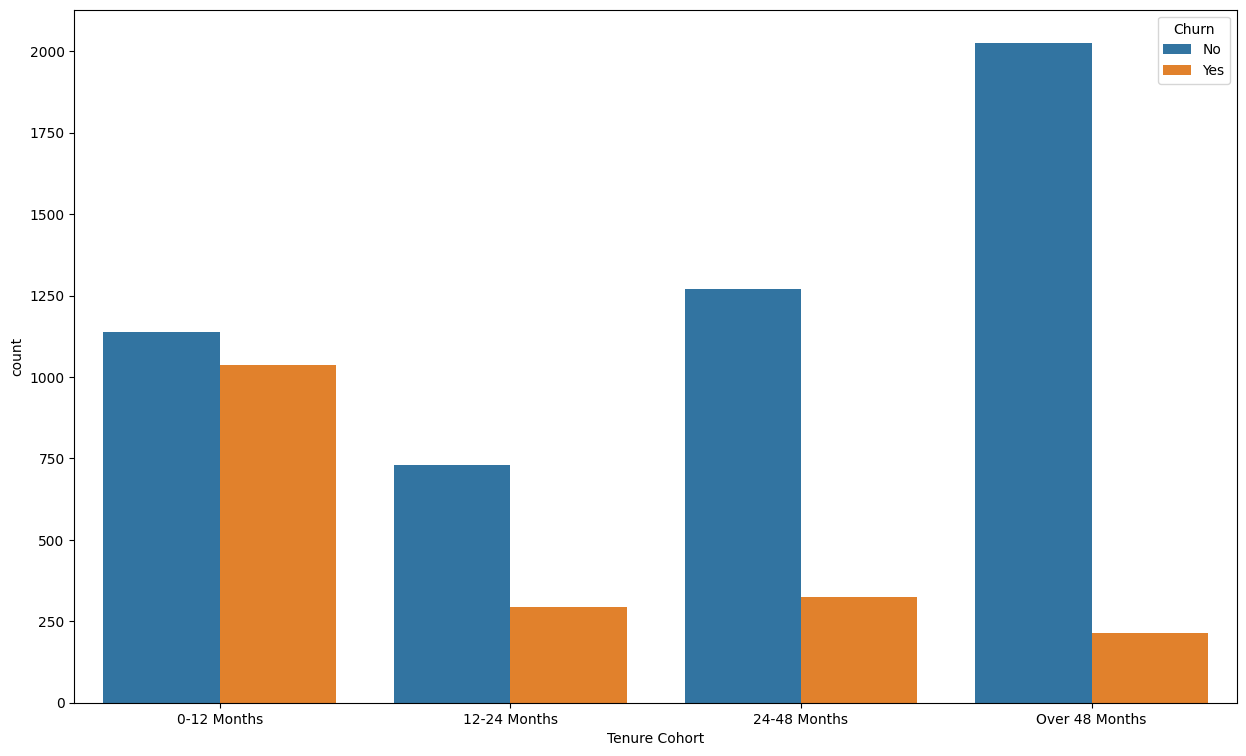

In [79]:
# CODE HERE
plt.figure(figsize=(15,9))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

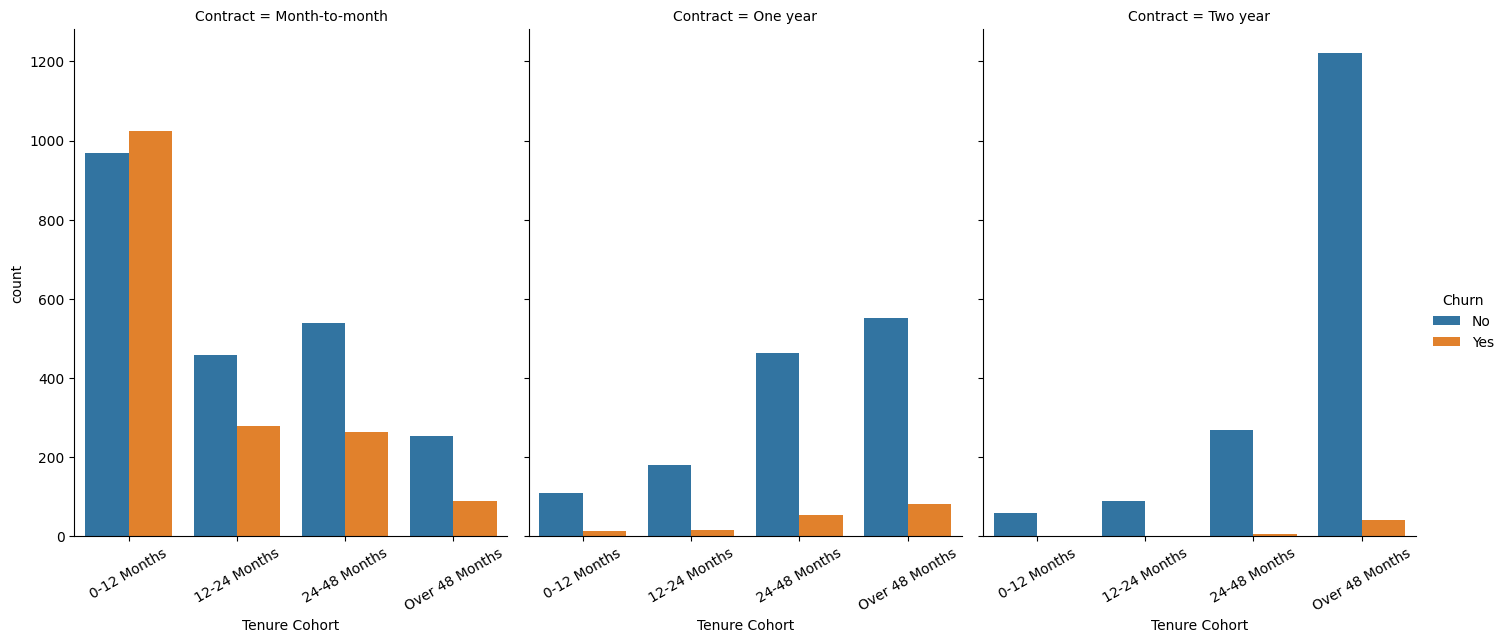

In [81]:
# CODE HERE
g = sns.catplot(x='Tenure Cohort', 
                hue='Churn', 
                col='Contract',
                data=df, 
                kind='count', 
                height=6, 
                aspect=0.8)

g.set_xticklabels(rotation=30)

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [4]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [4]:
columns_to_encode = ['gender', 'Partner', 'Dependents', 
                     'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' 
                     ]

In [5]:
X = pd.get_dummies(data=df.drop(['customerID', 'Tenure Cohort', 'Churn'], axis=1), drop_first=True,columns=columns_to_encode)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [8]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [9]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [6]:
# CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [105]:
X_train.shape

(6328, 30)

In [106]:
y_train.shape

(6328,)

## Other supervised learning methods that can be used

* Logistic regression
* KNN
* SVM

### **Using log reg**

In [107]:
from sklearn.linear_model import LogisticRegressionCV

log_model = LogisticRegressionCV(max_iter=5000)

log_model.fit(X_train, y_train)

LogisticRegressionCV(max_iter=5000)

In [108]:
y_pred = log_model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, hamming_loss
from sklearn.metrics import jaccard_score, log_loss, zero_one_loss

In [112]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

# Matthews Correlation Coefficient
matthews = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {matthews}\n")

# Cohen's Kappa: measures the inter-rater reliability for categorical items, assessing the level of agreement between two raters while taking into account the possibility of agreement occurring by chance.
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}\n")

# Hamming Loss: fraction of labels that are incorrectly predicted, i.e., it measures the average rate at which incorrect predictions are made
hamming = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {hamming}\n")

# Jaccard Score: compares the similarity and diversity of sample sets - i.e., the similarity between finite sample sets defined as the size of the intersection divided by the size of the union of the sample sets
jaccard = jaccard_score(y_test, y_pred, average='weighted')
print(f"Jaccard Score: {jaccard}\n")

# Log Loss
y_pred_proba = log_model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}\n")

# Zero-One Loss: fraction of misclassifications (wrong outputs) in the prediction made by the model
zero_one = zero_one_loss(y_test, y_pred)
print(f"Zero-One Loss: {zero_one}\n")

Accuracy: 0.828125

F1 Score: 0.8241425793282198

Precision: 0.8213686846689896

Recall: 0.828125

ROC AUC Score: 0.7186274869014034

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 505                  52
True Positive                  69                  78

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       557
           1       0.60      0.53      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704


Matthews Correlation Coefficient: 0.45802944800056467

Cohen's Kappa: 0.4566931142689492

Hamming Loss: 0.171875

Jaccard Score: 0.7201067487999101

Log Loss: 0.38909659848449446

Zero-One Loss: 0.171875



### **Using KNN (classification)**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': range(1, 101)}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 101)},
             scoring='accuracy')

In [116]:
best_knn = grid.best_estimator_

In [117]:
best_knn

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=61))])

In [121]:
y_pred = best_knn.predict(X_test_scaled)

In [122]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

# Matthews Correlation Coefficient
matthews = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {matthews}\n")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}\n")

# Hamming Loss
hamming = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {hamming}\n")

# Jaccard Score
jaccard = jaccard_score(y_test, y_pred, average='weighted')
print(f"Jaccard Score: {jaccard}\n")

# Log Loss
y_pred_proba = best_knn.predict_proba(X_test_scaled)
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}\n")

# Zero-One Loss
zero_one = zero_one_loss(y_test, y_pred)
print(f"Zero-One Loss: {zero_one}\n")

Accuracy: 0.8125

F1 Score: 0.8143053243596039

Precision: 0.8163486397555673

Recall: 0.8125

ROC AUC Score: 0.7262790214829199

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 487                  70
True Positive                  62                  85

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       557
           1       0.55      0.58      0.56       147

    accuracy                           0.81       704
   macro avg       0.72      0.73      0.72       704
weighted avg       0.82      0.81      0.81       704


Matthews Correlation Coefficient: 0.44392390419703864

Cohen's Kappa: 0.44367149989822674

Hamming Loss: 0.1875

Jaccard Score: 0.7042641617593413

Log Loss: 0.46894696505712635

Zero-One Loss: 0.1875



### **Using SVM (classification)**

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [10]:
pipe = make_pipeline(StandardScaler(), SVC(probability=True))

In [11]:
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'sigmoid']
}

In [12]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=2)

In [13]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   8.3s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   8.3s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   8.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   8.4s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   8.2s
[CV] END ......svc__C=0.1, svc__gamma=1, svc__kernel=sigmoid; total time=   3.4s
[CV] END ......svc__C=0.1, svc__gamma=1, svc__kernel=sigmoid; total time=   4.0s
[CV] END ......svc__C=0.1, svc__gamma=1, svc__kernel=sigmoid; total time=   3.2s
[CV] END ......svc__C=0.1, svc__gamma=1, svc__kernel=sigmoid; total time=   4.0s
[CV] END ......svc__C=0.1, svc__gamma=1, svc__kernel=sigmoid; total time=   3.4s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   5.3s
[CV] END ........svc__C=0.1, svc__gamma=0.1, sv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [15]:
best_svc = grid.best_estimator_

In [18]:
best_svc.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(C=1, gamma=0.01, probability=True))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(C=1, gamma=0.01, probability=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 0.01,
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': True,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [16]:
y_pred = best_svc.predict(X_test)

In [17]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

# Matthews Correlation Coefficient
matthews = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {matthews}\n")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}\n")

# Hamming Loss
hamming = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {hamming}\n")

# Jaccard Score
jaccard = jaccard_score(y_test, y_pred, average='weighted')
print(f"Jaccard Score: {jaccard}\n")

# Log Loss
y_pred_proba = best_svc.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}\n")

# Zero-One Loss
zero_one = zero_one_loss(y_test, y_pred)
print(f"Zero-One Loss: {zero_one}\n")

Accuracy: 0.828125

F1 Score: 0.8191295897725402

Precision: 0.8155880489864864

Recall: 0.828125

ROC AUC Score: 0.6960942366174477

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 514                  43
True Positive                  78                  69

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       557
           1       0.62      0.47      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.82      0.83      0.82       704


Matthews Correlation Coefficient: 0.435824083437636

Cohen's Kappa: 0.4298565003212679

Hamming Loss: 0.171875

Jaccard Score: 0.7162602310401989

Log Loss: 0.41391238247663636

Zero-One Loss: 0.171875



**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [20]:
dt = DecisionTreeClassifier(random_state=101)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

Accuracy: 0.7301136363636364

F1 Score: 0.7429767894706919

Precision: 0.7622114010743677

Recall: 0.7301136363636364

ROC AUC Score: 0.6516811392420523

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 438                 119
True Positive                  71                  76

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       557
           1       0.39      0.52      0.44       147

    accuracy                           0.73       704
   macro avg       0.63      0.65      0.63       704
weighted avg       0.76      0.73      0.74       704




              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



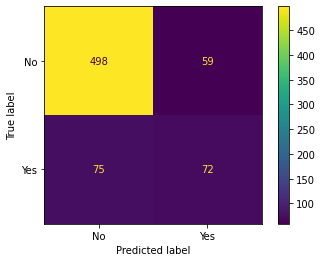

In [25]:
feature_importances = dt.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=True)

print(importances_df)

                                  Feature  Importance
14       OnlineBackup_No internet service    0.000000
18        TechSupport_No internet service    0.000000
20        StreamingTV_No internet service    0.000000
11                     InternetService_No    0.000000
16   DeviceProtection_No internet service    0.000000
22    StreamingMovies_No internet service    0.000000
8          MultipleLines_No phone service    0.001308
7                        PhoneService_Yes    0.003681
21                        StreamingTV_Yes    0.008933
12     OnlineSecurity_No internet service    0.009096
23                    StreamingMovies_Yes    0.009965
25                      Contract_Two year    0.010425
17                   DeviceProtection_Yes    0.011815
6                          Dependents_Yes    0.012967
27  PaymentMethod_Credit card (automatic)    0.013406
19                        TechSupport_Yes    0.015851
9                       MultipleLines_Yes    0.016404
24                      Cont

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'OnlineBackup_No internet service'),
  Text(1, 0, 'TechSupport_No internet service'),
  Text(2, 0, 'StreamingTV_No internet service'),
  Text(3, 0, 'InternetService_No'),
  Text(4, 0, 'DeviceProtection_No internet service'),
  Text(5, 0, 'StreamingMovies_No internet service'),
  Text(6, 0, 'MultipleLines_No phone service'),
  Text(7, 0, 'PhoneService_Yes'),
  Text(8, 0, 'StreamingTV_Yes'),
  Text(9, 0, 'OnlineSecurity_No internet service'),
  Text(10, 0, 'StreamingMovies_Yes'),
  Text(11, 0, 'Contract_Two year'),
  Text(12, 0, 'DeviceProtection_Yes'),
  Text(13, 0, 'Dependents_Yes'),
  Text(14, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(15, 0, 'TechSupport_Yes'),
  Text(16, 0, 'MultipleLines_Yes'),
  Text(17, 0, 'Contract_One year'),
  Text(18, 0, 'PaymentMethod_Mailed check'),
  Text(19, 0, 'SeniorCitizen'),
  Text(20, 0, 'Onli

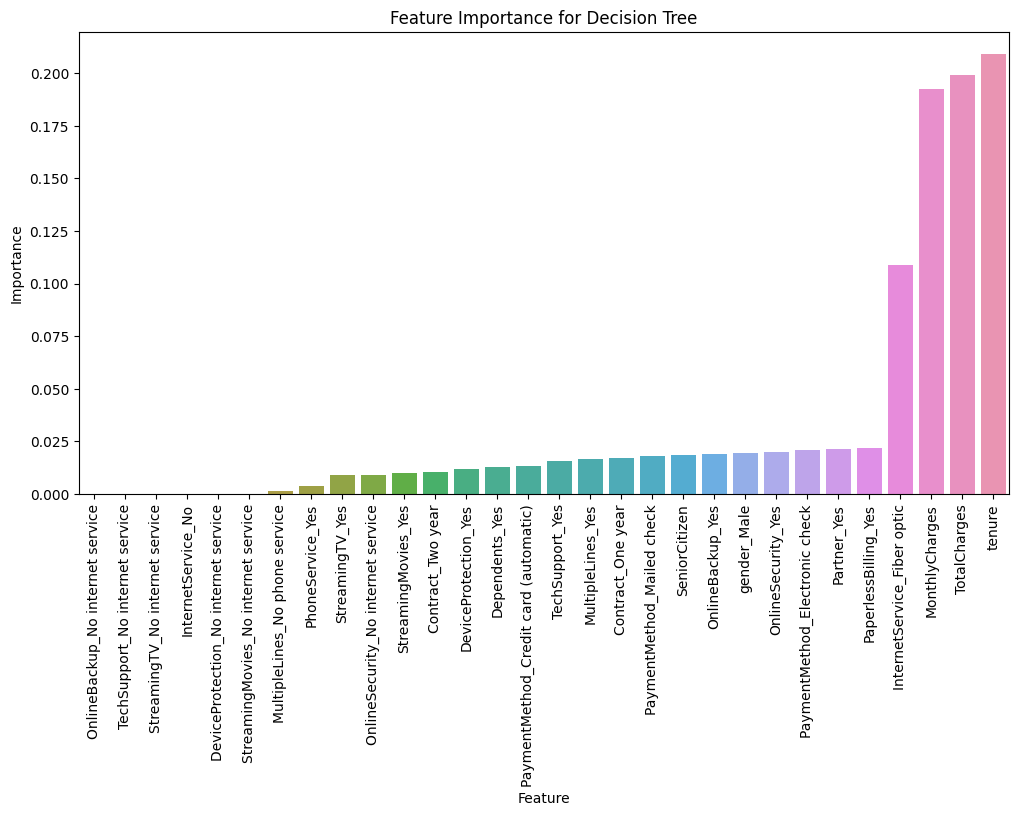

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=importances_df, x='Feature', y='Importance')
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90)

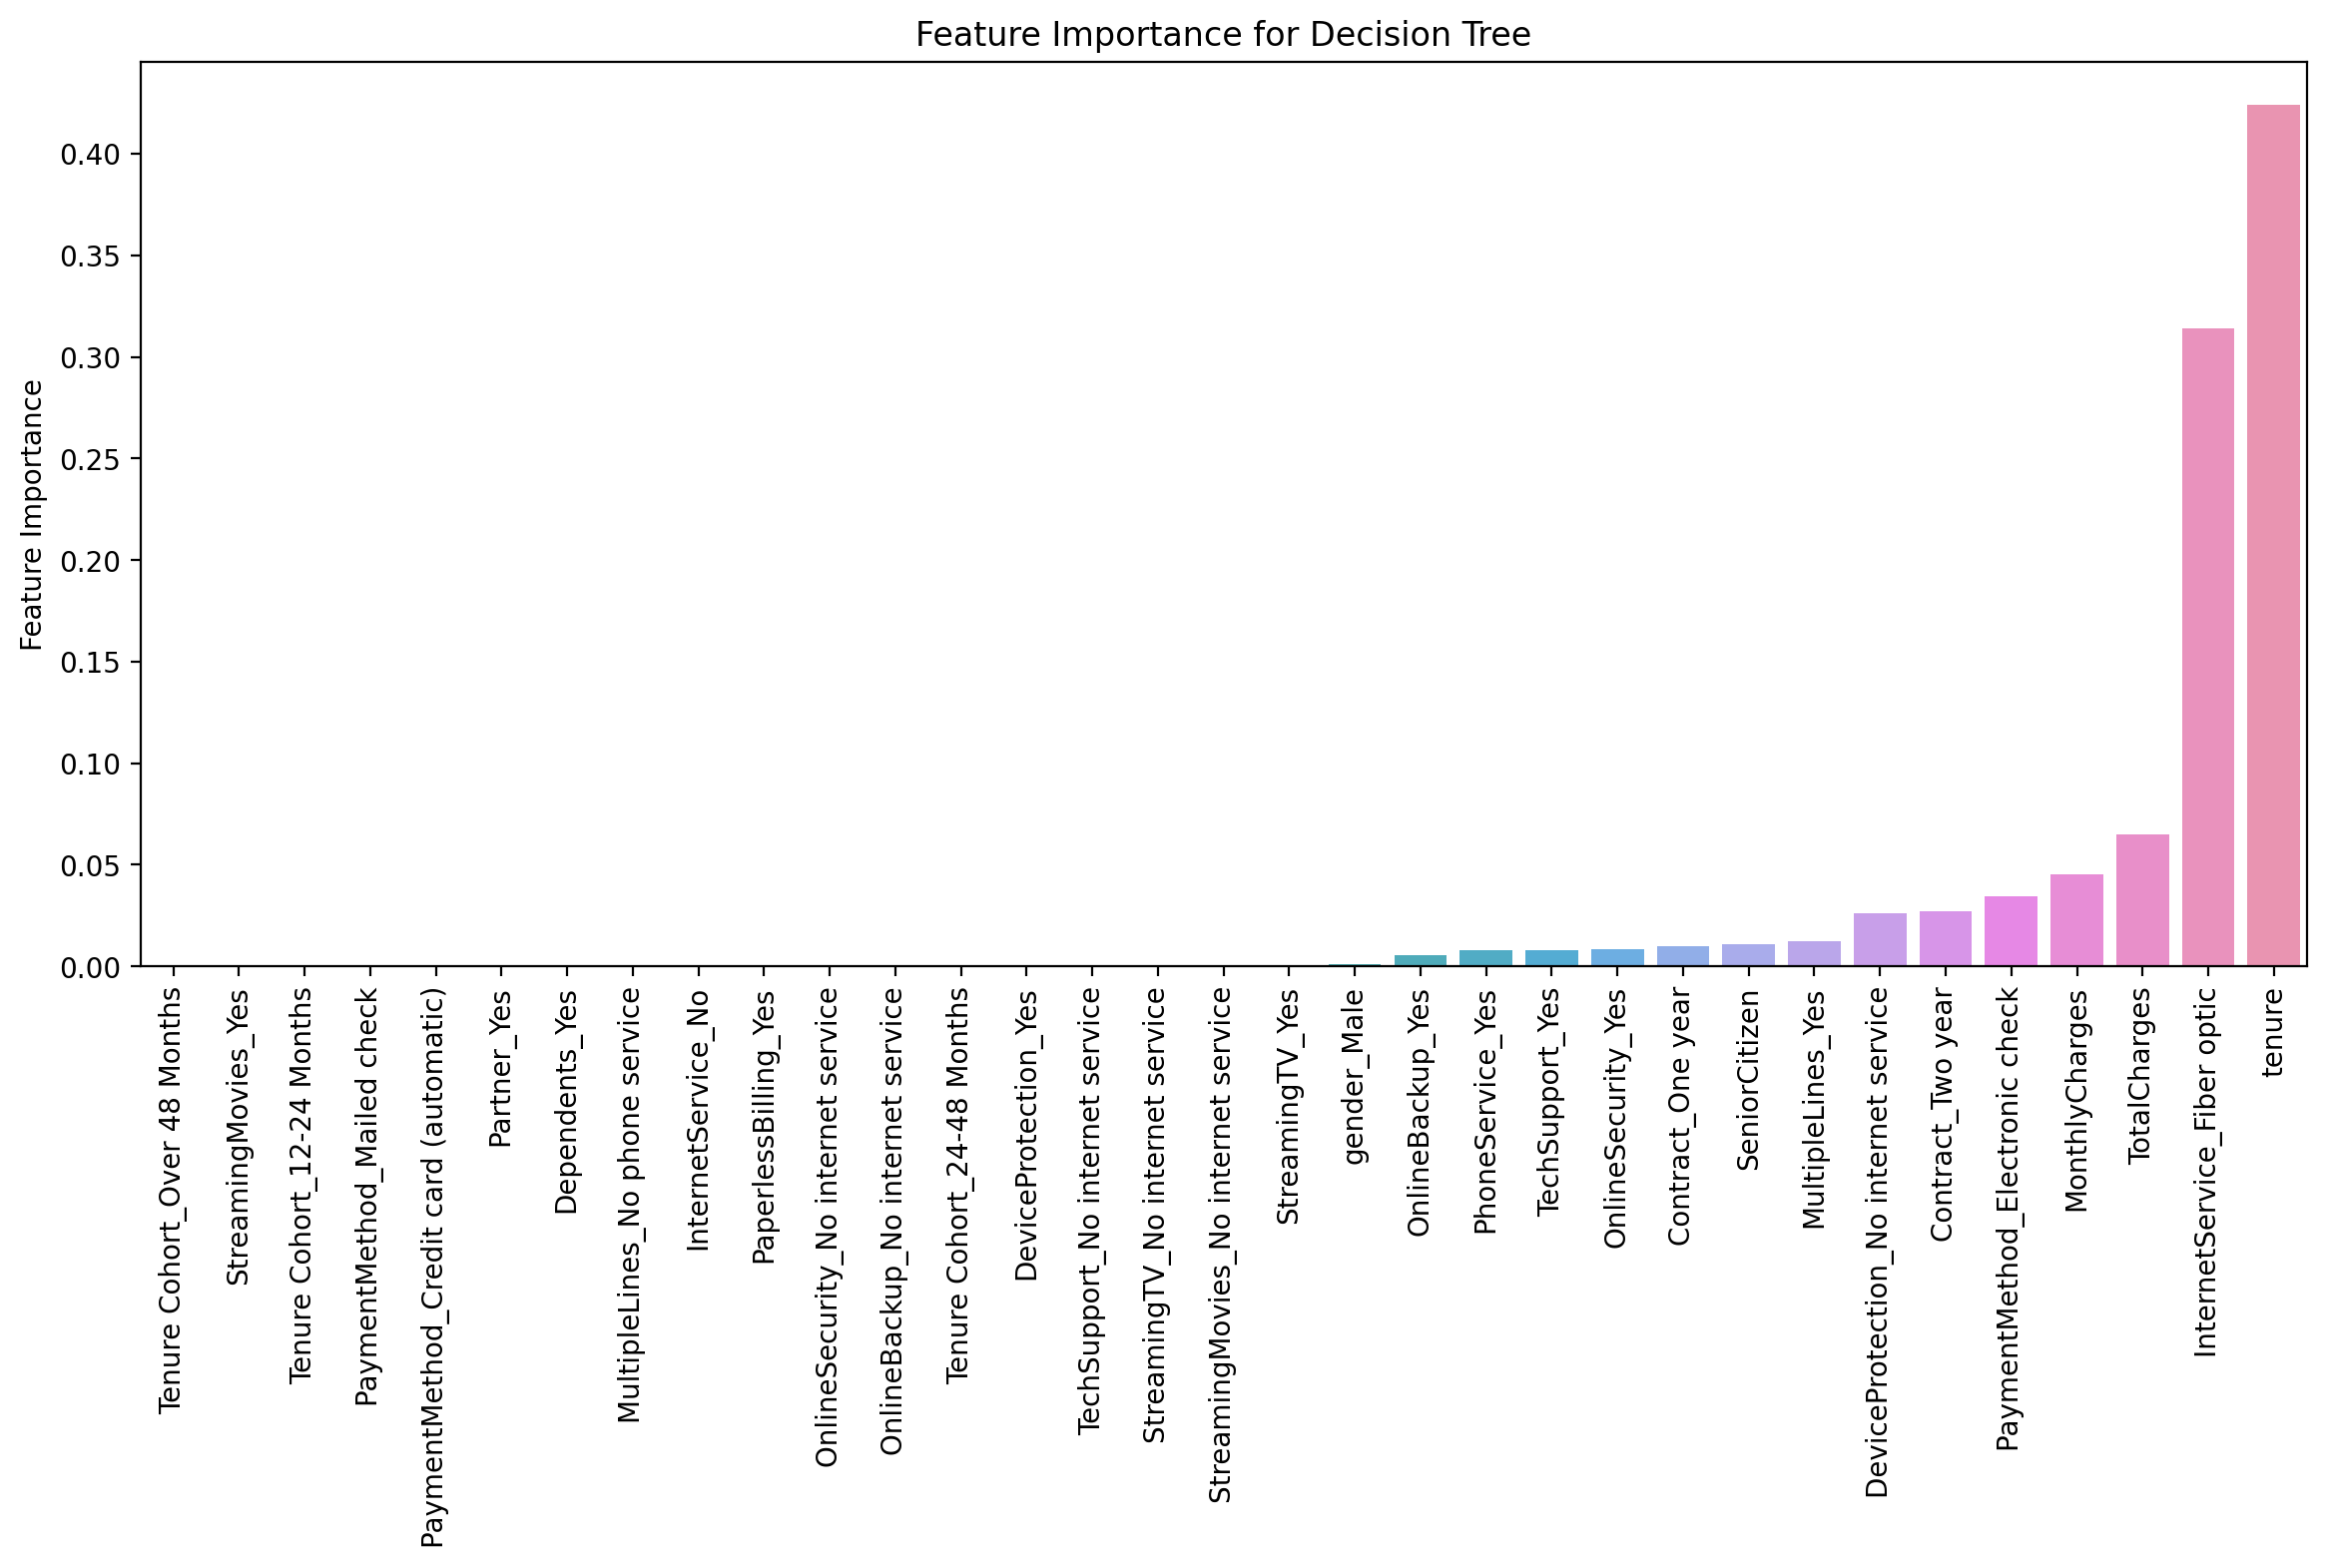

In [29]:
from sklearn.tree import plot_tree

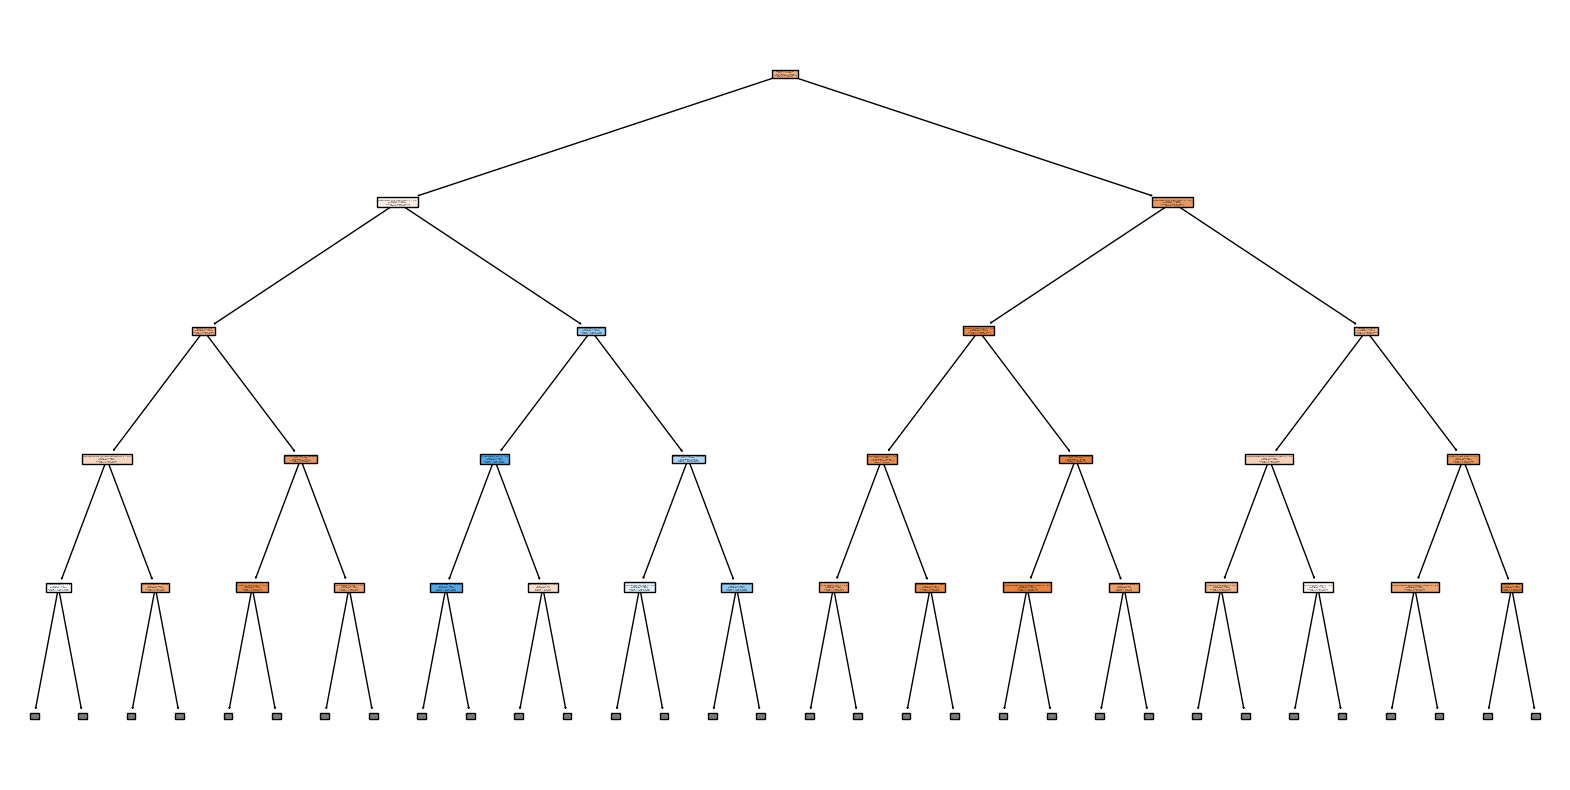

In [35]:
plt.figure(figsize=(20,10))
_ = plot_tree(dt, filled=True, feature_names=X.columns.tolist(), class_names=['Churn', 'No Churn']
              , max_depth=4
              )

### **With grid search**

In [36]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}

dt = DecisionTreeClassifier(random_state=101)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [37]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [43]:
print('Best parameters:', grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [44]:
y_pred = grid_search.predict(X_test)

In [45]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

Accuracy: 0.796875

F1 Score: 0.7903097789223275

Precision: 0.7857419702447164

Recall: 0.796875

ROC AUC Score: 0.6638271107365747

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 497                  60
True Positive                  83                  64

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704




In [48]:
best_dt = grid_search.best_estimator_

importances = best_dt.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=True)

print(importances_df)

                                  Feature  Importance
14       OnlineBackup_No internet service    0.000000
27  PaymentMethod_Credit card (automatic)    0.000000
26                   PaperlessBilling_Yes    0.000000
23                    StreamingMovies_Yes    0.000000
22    StreamingMovies_No internet service    0.000000
21                        StreamingTV_Yes    0.000000
20        StreamingTV_No internet service    0.000000
18        TechSupport_No internet service    0.000000
17                   DeviceProtection_Yes    0.000000
16   DeviceProtection_No internet service    0.000000
11                     InternetService_No    0.000000
29             PaymentMethod_Mailed check    0.000000
6                          Dependents_Yes    0.000000
4                             gender_Male    0.000000
8          MultipleLines_No phone service    0.000000
5                             Partner_Yes    0.000000
19                        TechSupport_Yes    0.004808
13                     Onlin

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'OnlineBackup_No internet service'),
  Text(1, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(2, 0, 'PaperlessBilling_Yes'),
  Text(3, 0, 'StreamingMovies_Yes'),
  Text(4, 0, 'StreamingMovies_No internet service'),
  Text(5, 0, 'StreamingTV_Yes'),
  Text(6, 0, 'StreamingTV_No internet service'),
  Text(7, 0, 'TechSupport_No internet service'),
  Text(8, 0, 'DeviceProtection_Yes'),
  Text(9, 0, 'DeviceProtection_No internet service'),
  Text(10, 0, 'InternetService_No'),
  Text(11, 0, 'PaymentMethod_Mailed check'),
  Text(12, 0, 'Dependents_Yes'),
  Text(13, 0, 'gender_Male'),
  Text(14, 0, 'MultipleLines_No phone service'),
  Text(15, 0, 'Partner_Yes'),
  Text(16, 0, 'TechSupport_Yes'),
  Text(17, 0, 'OnlineSecurity_Yes'),
  Text(18, 0, 'OnlineBackup_Yes'),
  Text(19, 0, 'PhoneService_Yes'),
  Text(20, 0, 'MultipleLines_Yes'),
  Tex

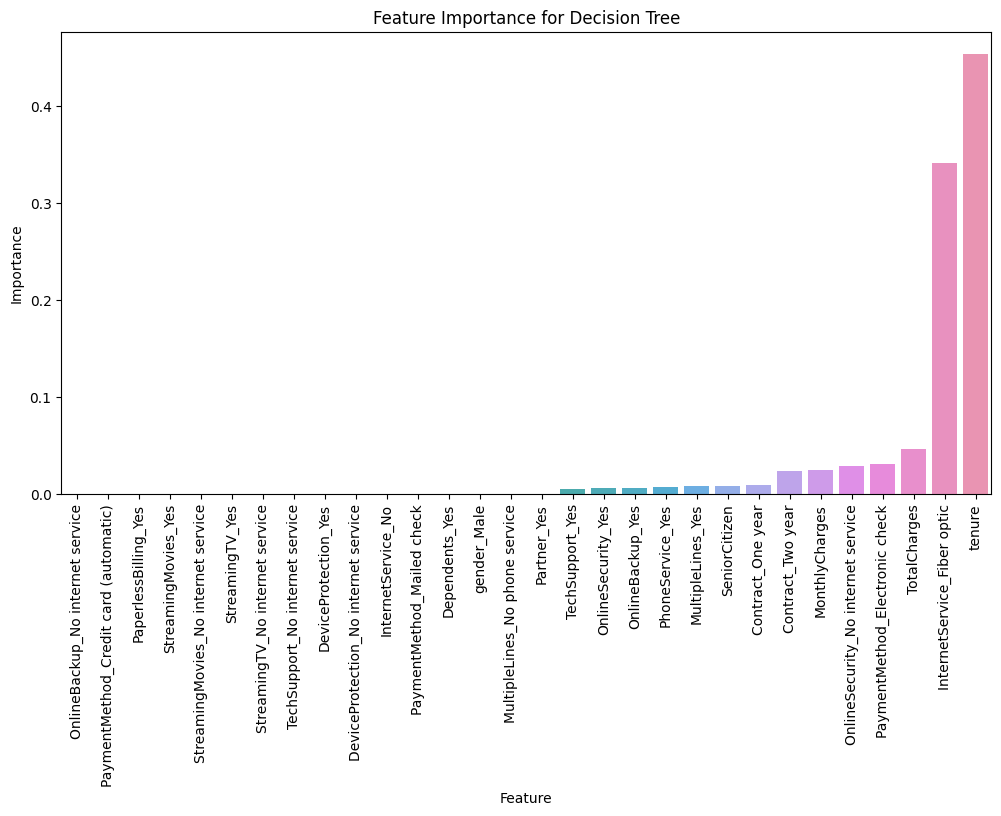

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(data=importances_df, x='Feature', y='Importance')
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90)

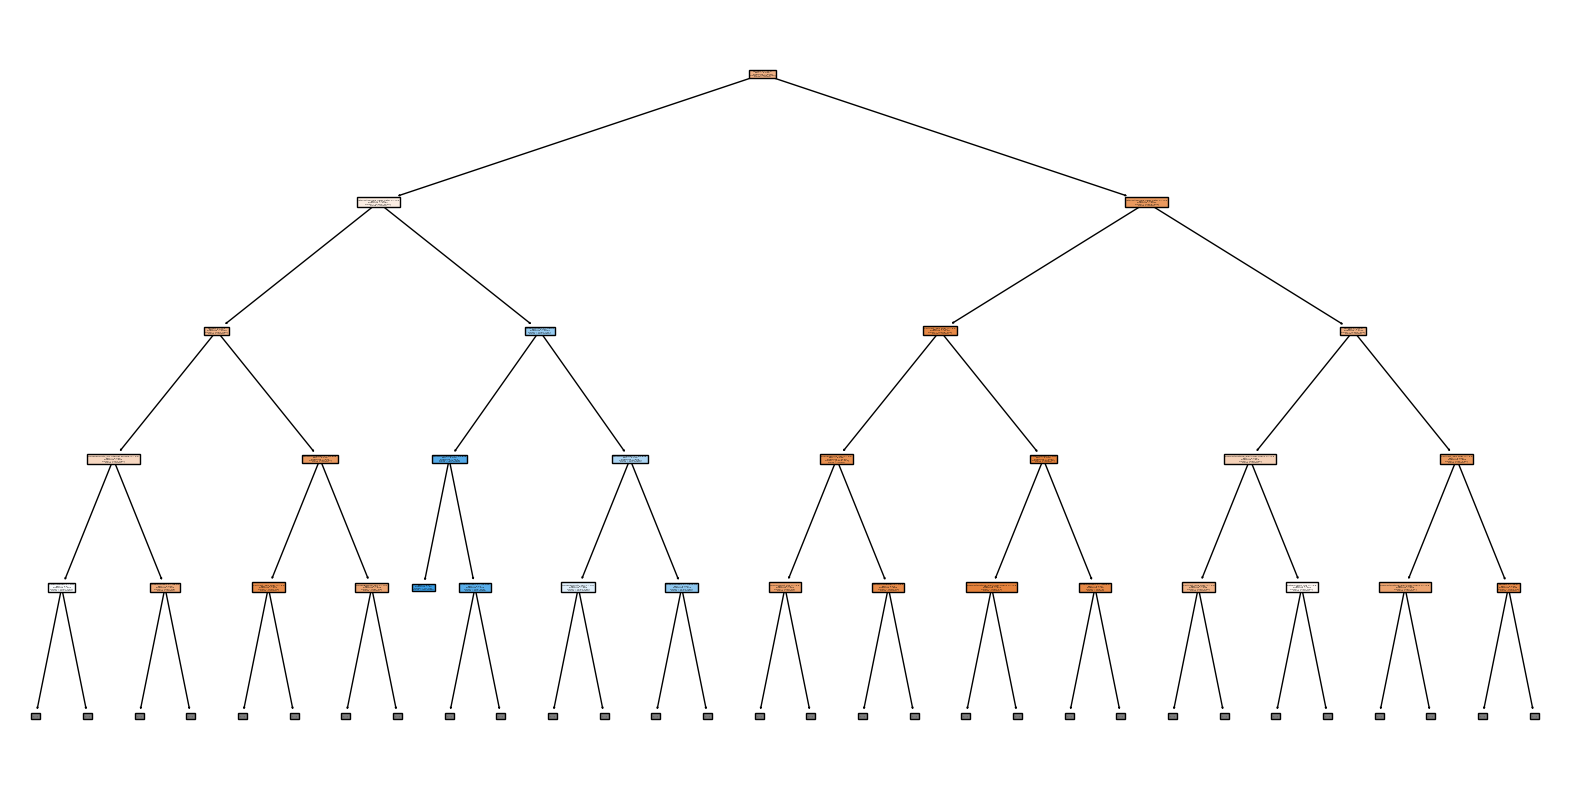

In [51]:
plt.figure(figsize=(20,10))
_ = plot_tree(best_dt, filled=True, feature_names=X.columns.tolist(), class_names=['Churn', 'No Churn']
              , max_depth=4
              )

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [52]:
# CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

In [53]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=make_scorer(f1_score))

In [54]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score), verbose=2)

In [55]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [56]:
y_pred = grid_search.predict(X_test)

In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

Accuracy: 0.8210227272727273

F1 Score: 0.8143819627936871

Precision: 0.8105760847993421

Recall: 0.8210227272727273

ROC AUC Score: 0.6966132952283247

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 507                  50
True Positive                  76                  71

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.59      0.48      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704




              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



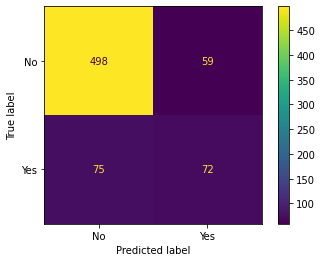

In [58]:
best_rf = grid_search.best_estimator_

importances = best_rf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=True)

print(importances_df)

                                  Feature  Importance
8          MultipleLines_No phone service    0.003454
7                        PhoneService_Yes    0.004975
14       OnlineBackup_No internet service    0.006325
20        StreamingTV_No internet service    0.007411
29             PaymentMethod_Mailed check    0.007732
12     OnlineSecurity_No internet service    0.008592
27  PaymentMethod_Credit card (automatic)    0.009001
17                   DeviceProtection_Yes    0.009788
21                        StreamingTV_Yes    0.010477
6                          Dependents_Yes    0.010532
23                    StreamingMovies_Yes    0.010966
4                             gender_Male    0.011608
5                             Partner_Yes    0.011721
11                     InternetService_No    0.012147
9                       MultipleLines_Yes    0.013952
0                           SeniorCitizen    0.014567
22    StreamingMovies_No internet service    0.014756
16   DeviceProtection_No int

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'MultipleLines_No phone service'),
  Text(1, 0, 'PhoneService_Yes'),
  Text(2, 0, 'OnlineBackup_No internet service'),
  Text(3, 0, 'StreamingTV_No internet service'),
  Text(4, 0, 'PaymentMethod_Mailed check'),
  Text(5, 0, 'OnlineSecurity_No internet service'),
  Text(6, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(7, 0, 'DeviceProtection_Yes'),
  Text(8, 0, 'StreamingTV_Yes'),
  Text(9, 0, 'Dependents_Yes'),
  Text(10, 0, 'StreamingMovies_Yes'),
  Text(11, 0, 'gender_Male'),
  Text(12, 0, 'Partner_Yes'),
  Text(13, 0, 'InternetService_No'),
  Text(14, 0, 'MultipleLines_Yes'),
  Text(15, 0, 'SeniorCitizen'),
  Text(16, 0, 'StreamingMovies_No internet service'),
  Text(17, 0, 'DeviceProtection_No internet service'),
  Text(18, 0, 'OnlineBackup_Yes'),
  Text(19, 0, 'TechSupport_No internet service'),
  Text(20, 0, 'PaperlessBillin

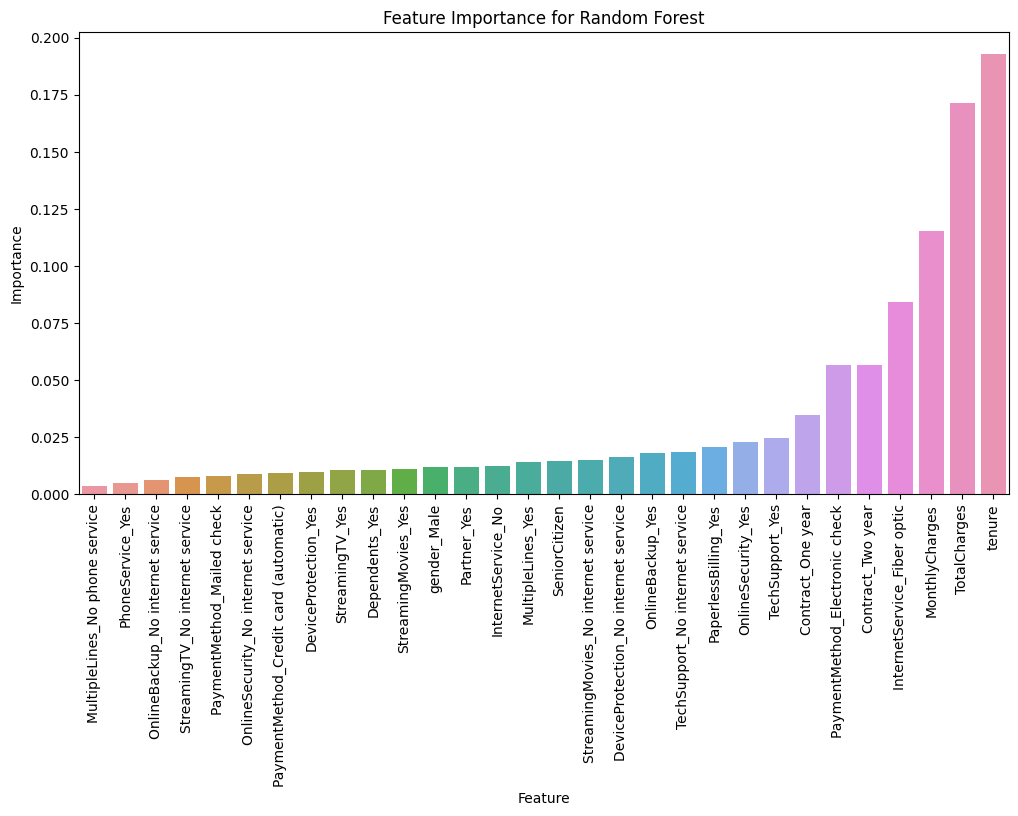

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(data=importances_df, x='Feature', y='Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=90)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

### **AdaBoost**

In [61]:
# CODE HERE
from sklearn.ensemble import AdaBoostClassifier

In [62]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

ab = AdaBoostClassifier()

grid_search = GridSearchCV(estimator = ab, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=make_scorer(f1_score))

In [63]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score), verbose=2)

In [64]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'learning_rate': 1, 'n_estimators': 50}


In [65]:
y_pred = grid_search.predict(X_test)

In [66]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

Accuracy: 0.8295454545454546

F1 Score: 0.8263418762088975

Precision: 0.8239542396031472

Recall: 0.8295454545454546

ROC AUC Score: 0.7245325419216161

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 504                  53
True Positive                  67                  80

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704




              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



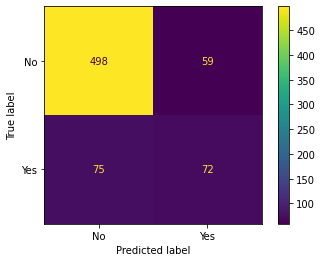

In [67]:
best_ab = grid_search.best_estimator_

importances = best_ab.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=True)

print(importances_df)

                                  Feature  Importance
14       OnlineBackup_No internet service        0.00
16   DeviceProtection_No internet service        0.00
15                       OnlineBackup_Yes        0.00
12     OnlineSecurity_No internet service        0.00
11                     InternetService_No        0.00
17                   DeviceProtection_Yes        0.00
8          MultipleLines_No phone service        0.00
22    StreamingMovies_No internet service        0.00
6                          Dependents_Yes        0.00
5                             Partner_Yes        0.00
4                             gender_Male        0.00
27  PaymentMethod_Credit card (automatic)        0.00
18        TechSupport_No internet service        0.00
21                        StreamingTV_Yes        0.02
24                      Contract_One year        0.02
20        StreamingTV_No internet service        0.02
19                        TechSupport_Yes        0.02
26                   Paperle

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'OnlineBackup_No internet service'),
  Text(1, 0, 'DeviceProtection_No internet service'),
  Text(2, 0, 'OnlineBackup_Yes'),
  Text(3, 0, 'OnlineSecurity_No internet service'),
  Text(4, 0, 'InternetService_No'),
  Text(5, 0, 'DeviceProtection_Yes'),
  Text(6, 0, 'MultipleLines_No phone service'),
  Text(7, 0, 'StreamingMovies_No internet service'),
  Text(8, 0, 'Dependents_Yes'),
  Text(9, 0, 'Partner_Yes'),
  Text(10, 0, 'gender_Male'),
  Text(11, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(12, 0, 'TechSupport_No internet service'),
  Text(13, 0, 'StreamingTV_Yes'),
  Text(14, 0, 'Contract_One year'),
  Text(15, 0, 'StreamingTV_No internet service'),
  Text(16, 0, 'TechSupport_Yes'),
  Text(17, 0, 'PaperlessBilling_Yes'),
  Text(18, 0, 'StreamingMovies_Yes'),
  Text(19, 0, 'SeniorCitizen'),
  Text(20, 0, 'OnlineSecurity_Yes'),


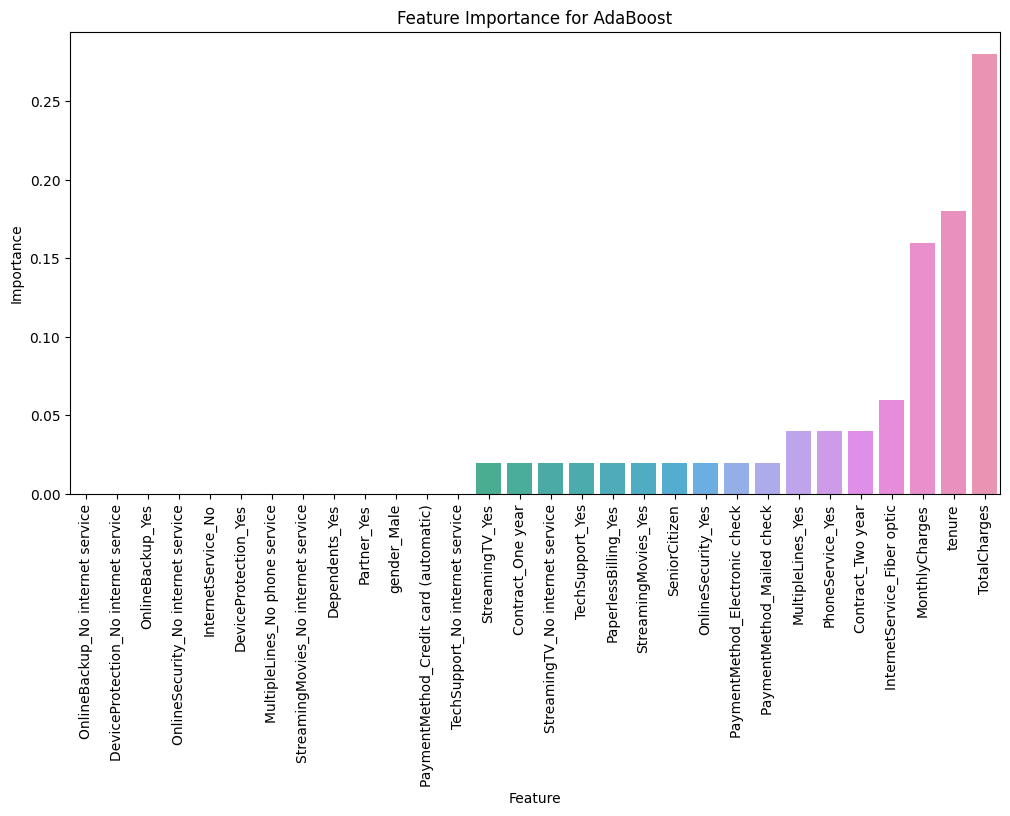

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(data=importances_df, x='Feature', y='Importance')
plt.title('Feature Importance for AdaBoost')
plt.xticks(rotation=90)

### **Gradient boosting**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a base model
gb = GradientBoostingClassifier()

# Create the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=make_scorer(f1_score))

In [71]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(f1_score), verbose=2)

In [72]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [73]:
y_pred = grid_search.predict(X_test)

In [74]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}\n")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\n")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}\n")

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])
print(f"Confusion Matrix: \n{cm_df}\n")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}\n")

Accuracy: 0.8167613636363636

F1 Score: 0.8108388914753863

Precision: 0.8070783351451106

Recall: 0.8167613636363636

ROC AUC Score: 0.6939202970236568

Confusion Matrix: 
               Predicted Negative  Predicted Positive
True Negative                 504                  53
True Positive                  76                  71

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.48      0.52       147

    accuracy                           0.82       704
   macro avg       0.72      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704




In [76]:
best_gb = grid_search.best_estimator_

# Get feature importances
importances = best_gb.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=True)

# Display the dataframe
print(importances_df)

                                  Feature  Importance
16   DeviceProtection_No internet service    0.000000
11                     InternetService_No    0.000000
12     OnlineSecurity_No internet service    0.000154
29             PaymentMethod_Mailed check    0.000352
5                             Partner_Yes    0.000910
17                   DeviceProtection_Yes    0.001099
27  PaymentMethod_Credit card (automatic)    0.001726
15                       OnlineBackup_Yes    0.001907
20        StreamingTV_No internet service    0.003308
6                          Dependents_Yes    0.003359
4                             gender_Male    0.003402
8          MultipleLines_No phone service    0.003769
9                       MultipleLines_Yes    0.004756
7                        PhoneService_Yes    0.004881
14       OnlineBackup_No internet service    0.005231
23                    StreamingMovies_Yes    0.005860
21                        StreamingTV_Yes    0.006201
18        TechSupport_No int

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'DeviceProtection_No internet service'),
  Text(1, 0, 'InternetService_No'),
  Text(2, 0, 'OnlineSecurity_No internet service'),
  Text(3, 0, 'PaymentMethod_Mailed check'),
  Text(4, 0, 'Partner_Yes'),
  Text(5, 0, 'DeviceProtection_Yes'),
  Text(6, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(7, 0, 'OnlineBackup_Yes'),
  Text(8, 0, 'StreamingTV_No internet service'),
  Text(9, 0, 'Dependents_Yes'),
  Text(10, 0, 'gender_Male'),
  Text(11, 0, 'MultipleLines_No phone service'),
  Text(12, 0, 'MultipleLines_Yes'),
  Text(13, 0, 'PhoneService_Yes'),
  Text(14, 0, 'OnlineBackup_No internet service'),
  Text(15, 0, 'StreamingMovies_Yes'),
  Text(16, 0, 'StreamingTV_Yes'),
  Text(17, 0, 'TechSupport_No internet service'),
  Text(18, 0, 'SeniorCitizen'),
  Text(19, 0, 'StreamingMovies_No internet service'),
  Text(20, 0, 'TechSupport_Yes

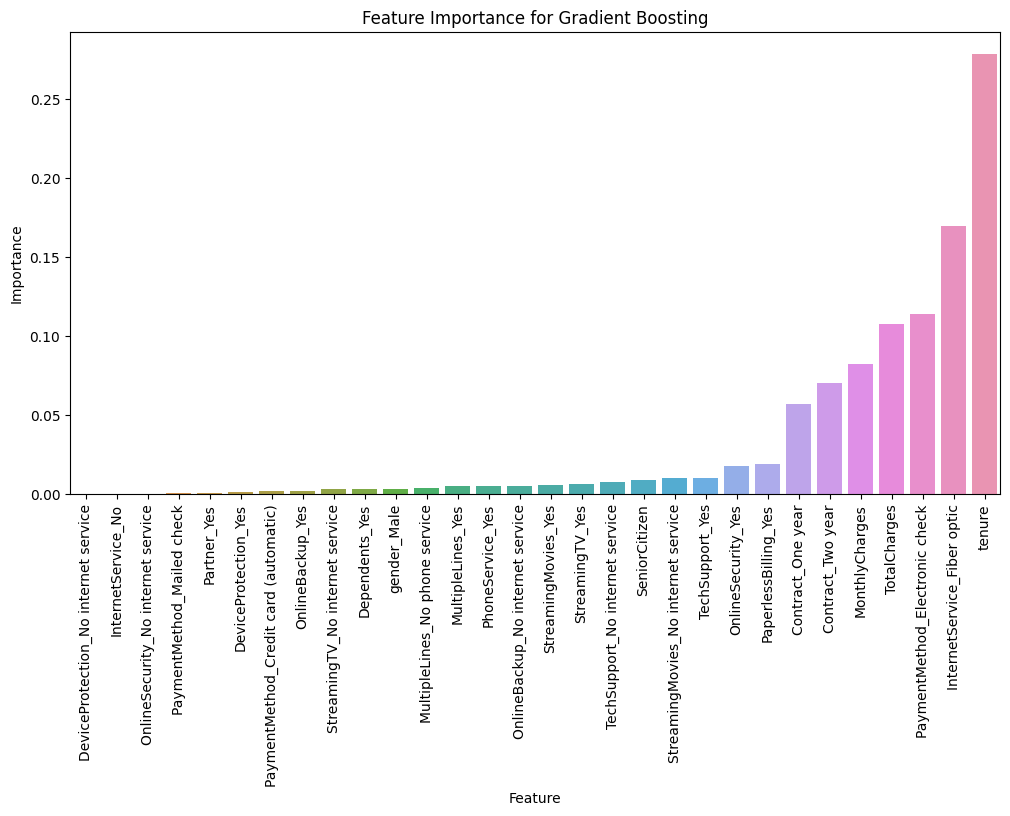

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=importances_df, x='Feature', y='Importance')
plt.title('Feature Importance for Gradient Boosting')
plt.xticks(rotation=90)

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

$\text{And when performing grid search on estimators, AdaBoost was still the best!}$

### Great job!